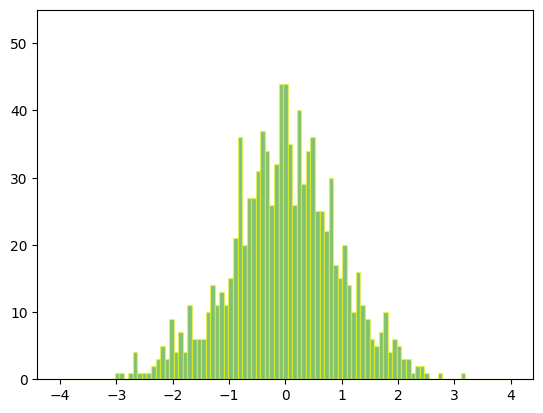

In [1]:
import functools

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

# Setting up a random number generator with a fixed state for reproducibility.
rng = np.random.default_rng(seed=19680801)
# Fixing bin edges.
HIST_BINS = np.linspace(-4, 4, 100)

# Histogram our data with numpy.
data = rng.standard_normal(1000)
n, _ = np.histogram(data, HIST_BINS)


def animate(frame_number, bar_container):
    # Simulate new data coming in.
    data = rng.standard_normal(1000)
    n, _ = np.histogram(data, HIST_BINS)
    for count, rect in zip(n, bar_container.patches):
        rect.set_height(count)

    return bar_container.patches

# Output generated via `matplotlib.animation.Animation.to_jshtml`.

fig, ax = plt.subplots()
_, _, bar_container = ax.hist(data, HIST_BINS, lw=1,
                              ec="yellow", fc="green", alpha=0.5)
ax.set_ylim(top=55)  # set safe limit to ensure that all data is visible.

anim = functools.partial(animate, bar_container=bar_container)
ani = animation.FuncAnimation(fig, anim, 50, repeat=False, blit=True)
plt.show()

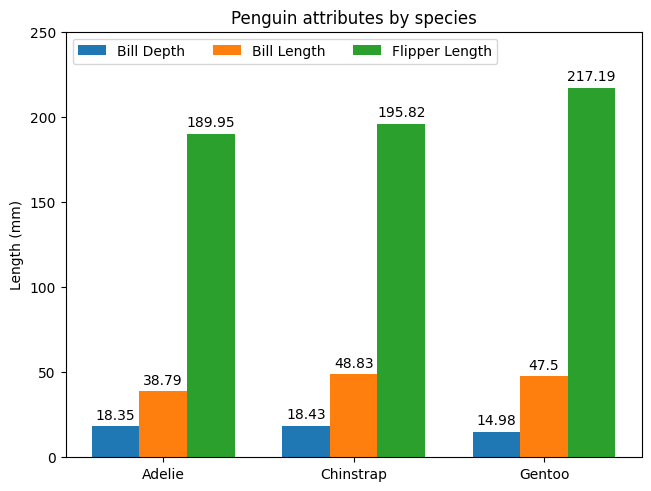

In [2]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

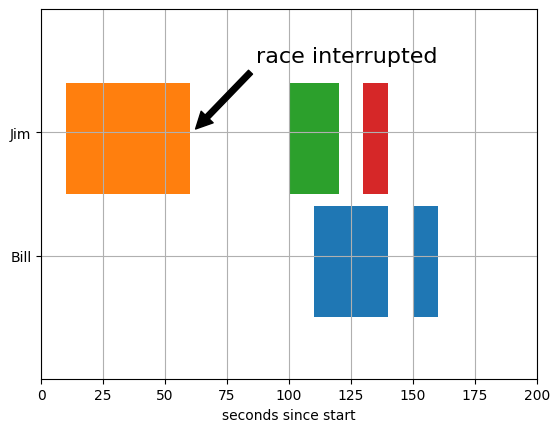

In [3]:
import matplotlib.pyplot as plt

# Horizontal bar plot with gaps
fig, ax = plt.subplots()
ax.broken_barh([(110, 30), (150, 10)], (10, 9), facecolors='tab:blue')
ax.broken_barh([(10, 50), (100, 20), (130, 10)], (20, 9),
               facecolors=('tab:orange', 'tab:green', 'tab:red'))
ax.set_ylim(5, 35)
ax.set_xlim(0, 200)
ax.set_xlabel('seconds since start')
ax.set_yticks([15, 25], labels=['Bill', 'Jim'])     # Modify y-axis tick labels
ax.grid(True)                                       # Make grid lines visible
ax.annotate('race interrupted', (61, 25),
            xytext=(0.8, 0.9), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=16,
            horizontalalignment='right', verticalalignment='top')

plt.show()